<a href="https://colab.research.google.com/github/onkararj/Projects/blob/main/NLP_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_table("/content/smsspamcollection.tsv")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

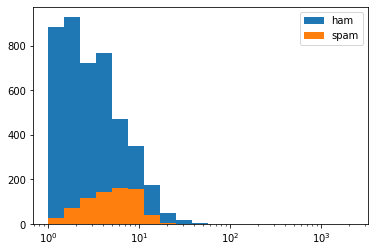

In [ ]:
plt.xscale("log")
bins = 1.5**np.arange(0,20)
plt.hist(df[df["label"]=="ham"]["punct"], bins=bins)
plt.hist(df[df["label"]=="spam"]["punct"], bins=bins)

plt.legend(["ham", "spam"])
plt.show()

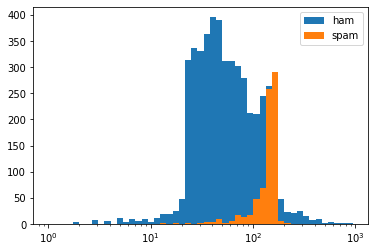

In [ ]:
plt.xscale("log")
bins = 1.15**np.arange(0,50)
plt.hist(df[df["label"]=="ham"]["length"], bins=bins)
plt.hist(df[df["label"]=="spam"]["length"], bins=bins)

plt.legend(["ham", "spam"])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
x = df.iloc[:, 2:]
y = df.iloc[:, 0]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         ham       0.86      0.97      0.91      1442
        spam       0.08      0.02      0.03       230

    accuracy                           0.84      1672
   macro avg       0.47      0.49      0.47      1672
weighted avg       0.75      0.84      0.79      1672



In [ ]:
mesg = "     "

In [ ]:
mesg.isspace()

True

In [ ]:
blanks = []

for i, lb, msg, lg, pn in df.itertuples():
  if(type(msg)==str):
    if(msg.isspace()):
      blanks.append(i)

blanks

[]

In [ ]:
df["message"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [ ]:
from wordcloud import WordCloud

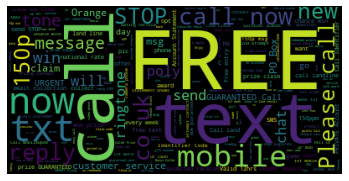

In [ ]:
wc = WordCloud()
wc.generate(" ".join(df[df["label"]=="spam"]["message"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

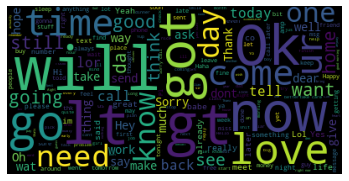

In [ ]:
wc = WordCloud()
wc.generate(" ".join(df[df["label"]=="ham"]["message"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
import nltk

from nltk.tokenize import word_tokenize
nltk.download("punkt")

from nltk.corpus import stopwords
nltk.download("stopwords")

from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def cleantext(text):
  #step1-: lower & tokenization
  tokens = word_tokenize(text.lower())

  #step2 -: filter out all the non alphabets
  ftoken = [t for t in tokens if(t.isalpha())]

  #step3 -: remove stopwords
  stopword = stopwords.words("english")
  ctoken = [t for t in ftoken if(t not in stopword)]

  #step4 -: lemmatization
  lemma = WordNetLemmatizer()
  ltoken = [lemma.lemmatize(t) for t in ctoken]

  return " ".join(ltoken)


In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df["message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
msg = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

In [ ]:
cleantext(msg)

'go jurong point available bugis n great world la e buffet cine got amore wat'

In [ ]:
df["message"].apply(cleantext)

0       go jurong point available bugis n great world ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                          ü b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [ ]:
df["message"] = df["message"].apply(cleantext)

In [ ]:
df.head()

,label,message,length,punct
0,ham,go jurong point available bugis n great world ...,111,9
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry wkly comp win fa cup final tkts may...,155,6
3,ham,u dun say early hor u c already say,49,6
4,ham,nah think go usf life around though,61,2


In [ ]:
df["message"][0]

'go jurong point available bugis n great world la e buffet cine got amore wat'

In [ ]:
x = df["message"]
y = df["label"]

In [ ]:
x

0       go jurong point available bugis n great world ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                          ü b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [ ]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
def mymodel(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  print(classification_report(ytest, ypred))
  return model

In [ ]:
from sklearn.linear_model import LogisticRegression as LG
from sklearn.svm import LinearSVC as lsvm
from sklearn.naive_bayes import GaussianNB as nb

In [ ]:
mymodel(LG())

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1442
        spam       0.97      0.84      0.90       230

    accuracy                           0.97      1672
   macro avg       0.97      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672



LogisticRegression()

In [ ]:
lsvm = mymodel(lsvm())

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1442
        spam       0.97      0.86      0.91       230

    accuracy                           0.98      1672
   macro avg       0.97      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
mymodel(nb())

              precision    recall  f1-score   support

         ham       0.98      0.88      0.93      1442
        spam       0.55      0.89      0.68       230

    accuracy                           0.88      1672
   macro avg       0.76      0.89      0.80      1672
weighted avg       0.92      0.88      0.89      1672



GaussianNB()

In [ ]:
mesg1 = "Free... Free... Free...! Buy 1 Get 1 Free, offer valid till june end... hurry up...!"
mesg2 = "tomorrow there will be a test on text classification"

In [ ]:
text = cleantext(mesg1)
text

'free free free buy get free offer valid till june end hurry'

In [ ]:
newx = cv.transform([text]).toarray()
newx

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pred = lsvm.predict(newx)
pred

array(['spam'], dtype=object)

In [ ]:
pred[0]

'spam'

In [ ]:
def checksentiment(mesg):
  text = cleantext(mesg)
  newx = cv.transform([text]).toarray()
  pred = lsvm.predict(newx)
  return pred[0]


In [ ]:
checksentiment(mesg1)

'spam'

In [ ]:
checksentiment(mesg2)

'ham'